<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Algoritmos/Jerarquico%20DB%20SCAN/4_3_3_JerarquicoDBSCAN_Base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Algoritmo jerárquico
Datos ejemplo

## Datos Ejemplo

(Ejercicio de Excel)

In [3]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
from pandas import DataFrame
import numpy as np
#Datos
Datos=pd.DataFrame({'Temperatura':[72,70,83,80,75,64 ],\
                    'Humedad':[90,96,86,90,70,65]})
#Algoritmo
Algoritmo = AgglomerativeClustering(n_clusters=3)

#Organizar grupos
Grupos=Algoritmo.fit(Datos)

#Cluster asignados
Grupos.labels_

####################################

array([1, 1, 2, 2, 0, 0])

In [8]:
#Análisis de distancias
from sklearn.metrics import pairwise_distances_chunked
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt


Matriz=next(pairwise_distances_chunked(Datos))
  #metric='euclidean' (default)
print(Matriz)

[[ 0.          6.32455532 11.70469991  8.         20.22374842 26.2488095 ]
 [ 6.32455532  0.         16.40121947 11.66190379 26.47640459 31.57530681]
 [11.70469991 16.40121947  0.          5.         17.88854382 28.31960452]
 [ 8.         11.66190379  5.          0.         20.61552813 29.68164416]
 [20.22374842 26.47640459 17.88854382 20.61552813  0.         12.08304597]
 [26.2488095  31.57530681 28.31960452 29.68164416 12.08304597  0.        ]]


[[ 2.          3.          5.          2.        ]
 [ 0.          1.          6.32455532  2.        ]
 [ 4.          5.         12.08304597  2.        ]
 [ 6.          7.         16.40121947  4.        ]
 [ 8.          9.         31.57530681  6.        ]]


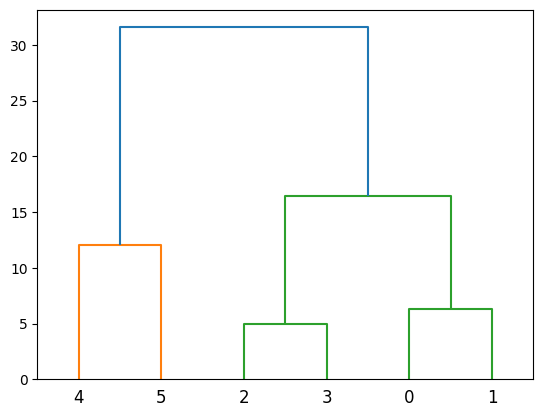

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_matrix = linkage(Datos, method='complete')
print(linkage_matrix)
dendrogram(linkage_matrix)
plt.show()

## Ejemplo con un conjunto de datos

   plas  pres  skin  insu
0   158    76    36   245
1   117    60    23   106
2   107    50    19     0
3    90    62    12    43
4    88    58    26    16
2    176
3    118
0    111
9    100
5     99
7     74
8     35
4     32
1     20
6      3
Name: count, dtype: int64
[[  13.          417.            0.            2.        ]
 [ 116.          696.            0.            2.        ]
 [  25.          600.            0.            2.        ]
 ...
 [1524.         1528.          344.19907031   52.        ]
 [1526.         1532.          596.16524555   55.        ]
 [1531.         1533.          867.13205453  768.        ]]


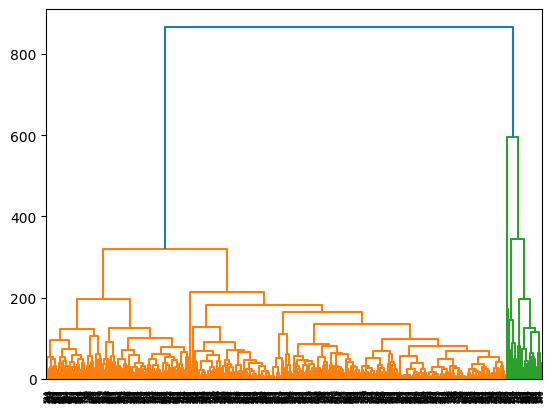

In [24]:
frame=pd.read_csv('diabetes.csv')

datos= frame[['plas','pres','skin','insu']]
print(datos.head())

#### Algoritmo ######

Algoritmo = AgglomerativeClustering(n_clusters=10)
Etiquetas = Algoritmo.fit(datos)
Etiquetas.labels_

# Numero de instancias por grupo

etiquetas=pd.Series(Etiquetas.labels_) #Genera una serie con los datos de los grupos
print(etiquetas.value_counts())

linkage_matrix = linkage(datos, method='complete')
print(linkage_matrix)
dendrogram(linkage_matrix)
plt.show()

#DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
Algoritmo=DBSCAN(eps=10, min_samples=10)

Grupos=Algoritmo.fit(Datos)
#print(Grupos.labels_)
labels=pd.Series(Grupos.labels_)


ConteoGrupos=labels.value_counts()
print("Clusters generados:", len(ConteoGrupos)-1)
print("Instancias 'ruido':", ConteoGrupos.loc[-1])
print("Instancias por cluster:\n",pd.Series(labels).value_counts())


In [ ]:
from sklearn import metrics
print(metrics.silhouette_score(Datos,Grupos.labels_, metric='euclidean'))

In [ ]:
%%shell
jupyter nbconvert --to html 4_3_3_JerarquicoDBSCAN.ipynb